### Suleimenova Madina

### Clustering Techniques

###  Exercise 3: Implementing K-Means Clustering

In [3]:
#  Tasks:
#  ○ Loadadataset (e.g., customer data or a toy dataset).
#  ○ UseK-Meansto group the data into clusters.
#  ○ Visualize the clusters using a scatter plot.

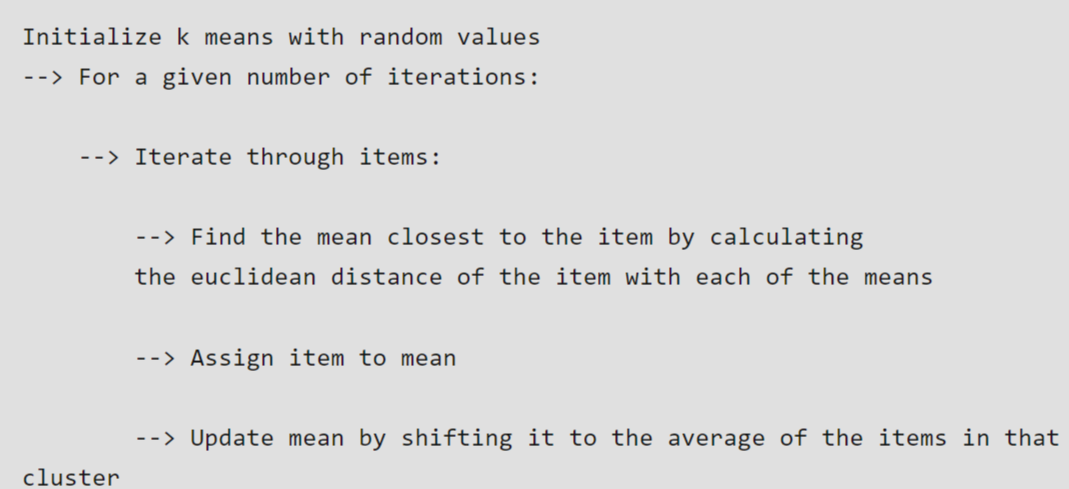

In [24]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [25]:
# Libs that I used
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
# First of all lets download our dataset
dataset = pd.read_csv('C:\\Users\\sulej\\OneDrive\\Рабочий стол\\7 semester\\Data Mining\\Mall_Customers.csv')

In [27]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [28]:
# Now I can choose features by which I will cluster
x = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

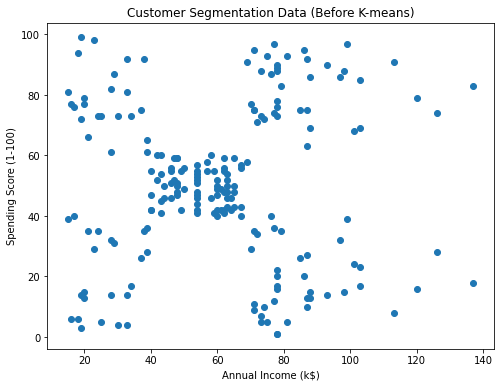

In [29]:
# I want to plot it before clustering just to see how it works
plt.figure(figsize=(8, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.title('Customer Segmentation Data (Before K-means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [30]:
# Ok, that looks terrible

In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

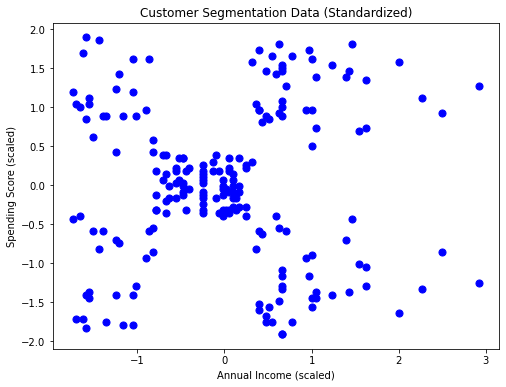

In [32]:
# Now I want to plot scaled just to see the progress
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c='blue', s=50)
plt.title('Customer Segmentation Data (Standardized)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [33]:
# Well nothing changed it still looks horrible

In [45]:
# Now we can implement kmeans
# Я выбрала к=5 так как по рисунку это было логичней
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_scaled)
y_kmeans = kmeans.predict(x_scaled)

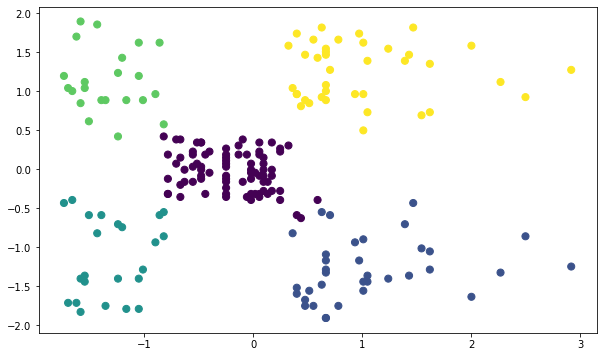

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

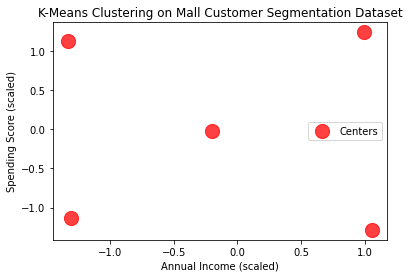

In [47]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
plt.title('K-Means Clustering on Mall Customer Segmentation Dataset')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

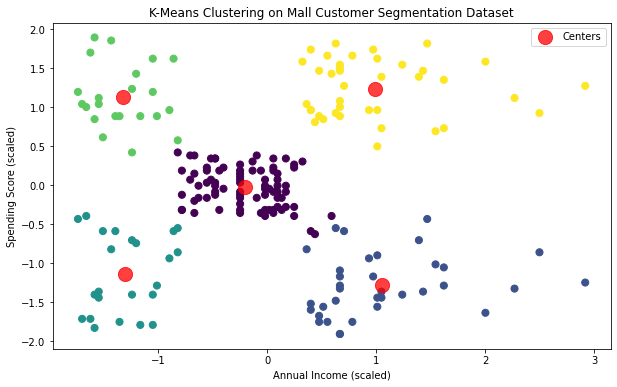

In [48]:
# and combined plot
# Plot the clustered points
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')

plt.title('K-Means Clustering on Mall Customer Segmentation Dataset')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

### Exercise 4: Evaluating K-Means Clustering

In [49]:
# Libs that I use 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [50]:
# W eneed to calculate inertia for a range of k values
# inertia = sum of squared distances of samples to their closest cluster center

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\sulej\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


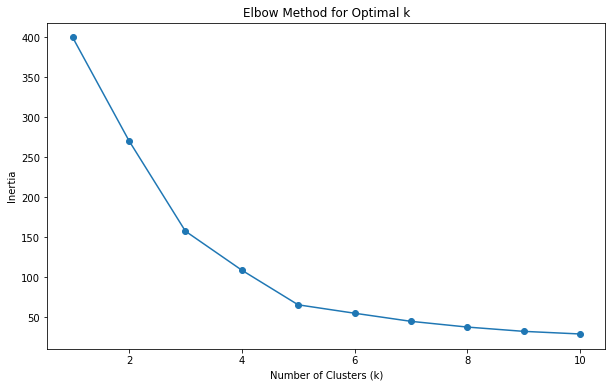

In [51]:
# Now lets plot it
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
